In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import time
from PIL import Image
from keras.preprocessing import image

In [ ]:
import tensorflow as tf
import tensorflow as ktf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten,GlobalMaxPooling2D, Dropout, MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,concatenate,Input,Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import InceptionV3
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import json
import glob
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import ResNet50

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
rotation_range=60,
brightness_range=(0.5,1.5))
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/skin_C/train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/skin_C/val',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 2307 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.1, zoom_range=(0.5,1.5), rotation_range=60, brightness_range=(0.5,1.5))
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/skin_C/train',
        target_size=(256, 256),
        batch_size=128,
        class_mode='binary',
        subset='training')

validation_generator  = train_datagen.flow_from_directory(
        '/content/drive/My Drive/skin_C/val',
        target_size=(256, 256),
        batch_size=128,
        class_mode='binary',
        subset='validation')

Found 2077 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
inception=tf.keras.applications.inception_v3.InceptionV3(include_top=False,input_shape=(256,256,3),weights='imagenet')
#pretrain_model_path = '/content/drive/My Drive/v3.h5'
layer=inception.get_layer('mixed7')
#x.load_weights(pretrain_model_path)
x=tf.keras.layers.Flatten()(layer.output)
x=tf.keras.layers.Dense(units=1024,activation='relu')(x)
x=tf.keras.layers.Dense(units=512,activation='relu')(x)
x=tf.keras.layers.Dense(1)(x)
out=tf.keras.layers.Activation(activation='sigmoid')(x)

model=tf.keras.Model(inputs=inception.input,outputs=out)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])


model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


 conv2d_18 (Conv2D)             (None, 29, 29, 64)   16384       ['average_pooling2d_1[0][0]']    
                                                                                                  
 batch_normalization_12 (BatchN  (None, 29, 29, 64)  192         ['conv2d_12[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_14 (BatchN  (None, 29, 29, 64)  192         ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_17 (BatchN  (None, 29, 29, 96)  288         ['conv2d_17[0][0]']              
 ormalization)                                                                                    
          

In [ ]:
batch_size=32
model_info=model.fit(training_set,
steps_per_epoch = 2307//batch_size,
epochs = 60,
validation_data = test_set,
validation_steps = 660//batch_size)

Epoch 1/60
72/72 [==============================] - 756s 10s/step - loss: 0.5523 - accuracy: 0.7679 - val_loss: 0.3944 - val_accuracy: 0.8516
Epoch 2/60
72/72 [==============================] - 52s 722ms/step - loss: 0.3296 - accuracy: 0.8360 - val_loss: 0.5477 - val_accuracy: 0.8438
Epoch 3/60
72/72 [==============================] - 53s 728ms/step - loss: 0.2698 - accuracy: 0.8857 - val_loss: 0.4666 - val_accuracy: 0.8672
Epoch 4/60
72/72 [==============================] - 53s 729ms/step - loss: 0.2648 - accuracy: 0.8892 - val_loss: 0.4946 - val_accuracy: 0.8391
Epoch 5/60
72/72 [==============================] - 53s 726ms/step - loss: 0.2379 - accuracy: 0.8998 - val_loss: 0.6399 - val_accuracy: 0.8813
Epoch 6/60
72/72 [==============================] - 52s 727ms/step - loss: 0.2318 - accuracy: 0.8936 - val_loss: 0.4959 - val_accuracy: 0.8984
Epoch 7/60
72/72 [==============================] - 52s 723ms/step - loss: 0.1989 - accuracy: 0.9182 - val_loss: 1.1851 - val_accuracy: 0.8781


In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize=(16, 8))
    plt.subplot(1,3,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch No.')
    acc = "Train Accuracy:{}".format(str(round(history.history['accuracy'][-1],2)))
    val_acc = "Val Accuracy:{}".format(str(round(history.history['val_accuracy'][-1],2)))
    plt.legend([acc, val_acc], loc='upper left')
    plt.savefig('/content/drive/My Drive/Accuracy_Curve1(60).png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,3,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch No.')
    loss = "Train Loss:{}".format(str(round(history.history['loss'][-1],2)))
    val_loss = "Val Loss:{}".format(str(round(history.history['val_loss'][-1],2)))
    plt.legend([loss, val_loss], loc='upper right')
    plt.savefig('/content/drive/My Drive/Loss_Curve1(60).png')

    # plt.subplot(1,3,3)
    # plt.plot(history.history['mean_IOU_gpu'])
    # plt.plot(history.history['val_mean_IOU_gpu'])
    # plt.title('Mean_IoU')
    # plt.ylabel('Mean_IoU')
    # plt.xlabel('Epoch No.')
    # plt.legend(['train', 'test'], loc='upper left')
    # plt.savefig('/content/drive/My Drive/Mean_IoU_curve.png')

In [ ]:
model.save('my_model30.h5')

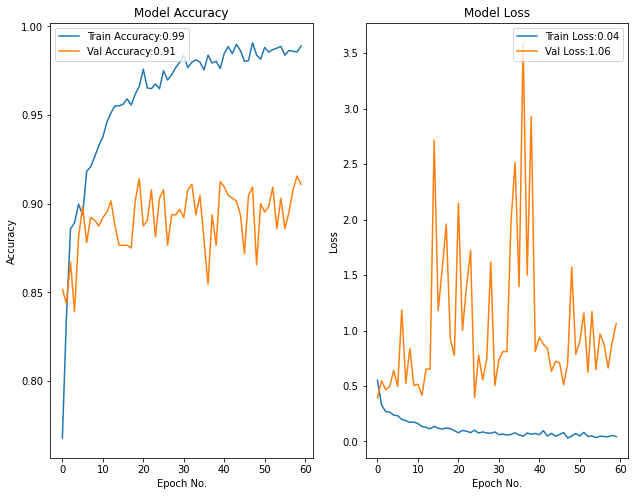

In [ ]:
plot_learning_curve(model_info)